# K-Means Clustering

This notebook demonstrates the implementation of the k-means clustering algorithm on a **test dataset** to **show functionality/whether or not it works well**. For an explanation of how k-means clustering works, see **this README**. 

This notebook is sectioned into **these sections**

### Library Imports
This section imports the libraries **and modules** required to run logistic regression. The **following dependencies are required**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rice_ml.preprocess import *
from rice_ml.unsupervised_learning.clustering import *
from rice_ml.unsupervised_learning.pca import *
from rice_ml.postprocess.unsupervised import *
import sklearn

### Data Loading & Cleaning
The data used in this notebook comes from **the wine dataset with given features. It is similar in process to DBSCAN [link notebook], which allows for easy comparison of the clustering algorithms.**

In [2]:
wine_data = sklearn.datasets.load_wine(as_frame = True)
wine_data = wine_data.frame
display(wine_data)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


To ensure that the dataset does not contain missing data, we apply a series of preprocessing **algorithms**, including dropping any rows with missing values or that are identified to be duplicates of another.

In [3]:
wine_data_missing = missing_data(wine_data, 'drop')
wine_data_cleaned = duplicate_identify(wine_data_missing, True)

Because k-means clustering is an unsupervised learning technique, there is no **distinction between a target/nontarget data**. Thus, the dataset does not need to be further divided. However, because there are **too many features, we will apply PCA to simplify it**. For a **more comprehensive overview of the feature selection/why PCA chosen, see [this notebook]**

In [4]:
pca = PCA(3)
pca.fit(wine_data_cleaned)
wine_data_pca = pca.transform(wine_data_cleaned)

### Data Visualization

To better understand the **distribution of features** and their relation to one another, we can visualize the relationships between the principal components in three dimensions.

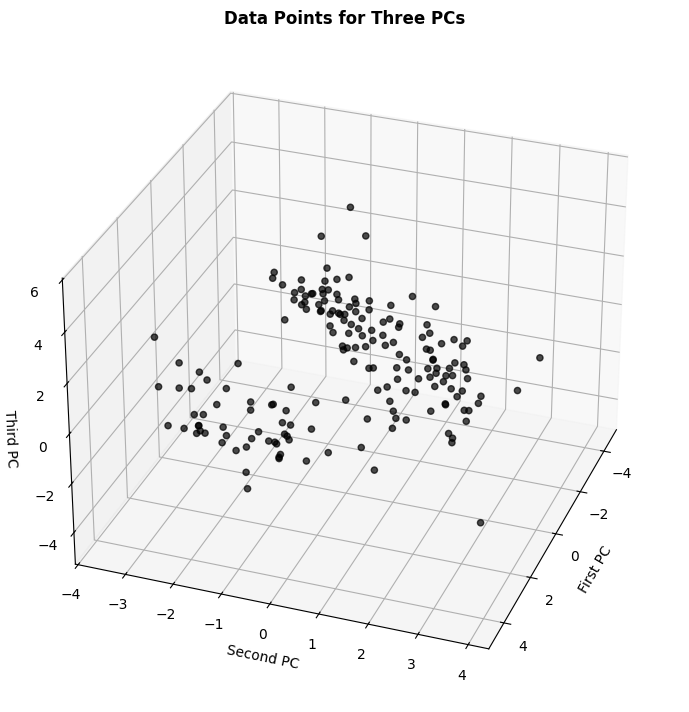

In [5]:
# Visualizing the transformed data
fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(wine_data_pca[:, 0], wine_data_pca[:, 1], wine_data_pca[:, 2], c = 'black', alpha = 0.7)
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
ax.set_zlabel("Third PC")
ax.view_init(elev = 30, azim = 20)
fig.tight_layout()
plt.title("Data Points for Three PCs", fontweight = 'bold')
plt.show()

As in DBSCAN, some clusters appear to be present in this data, which **k-means will attempt to evaluate**

### K-Means Implementation

This section **implements a basic k-means algorithm for clustering. DBSCAN returned two clusters, so we will begin with a visualization of two clusters using k-means clustering**

In [6]:
kmeans = k_means(2, 100)
kmeans.fit(wine_data_pca)
labels = kmeans.cluster_labels

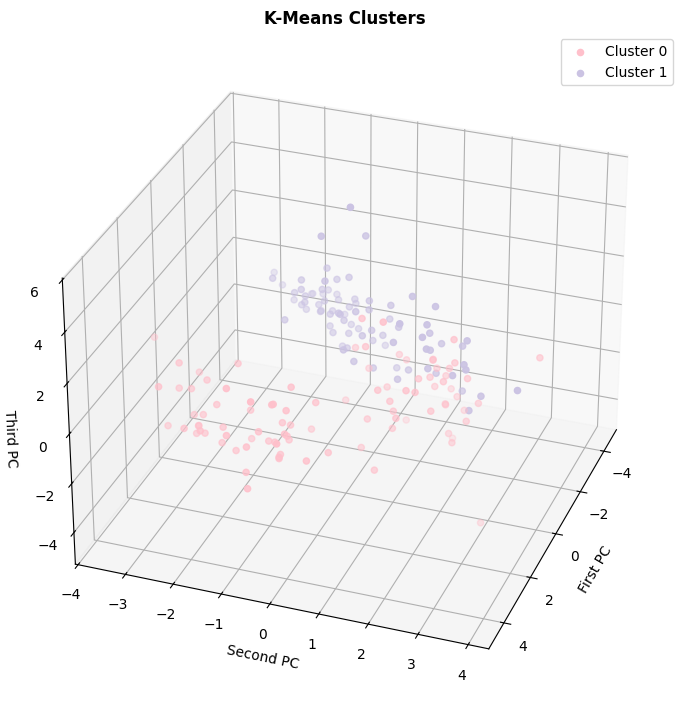

In [7]:
# Visualizing the transformed data with k-means clusters
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(labels)
label_to_color = {0: 'pink', 1: '#CBC3E3', 2: 'gray'}

for label in unique_labels:
    mask = (labels == label)
    color = label_to_color.get(label)  # fallback color just in case
    marker = 'o'
    
    ax.scatter(
        wine_data_pca[mask, 0],
        wine_data_pca[mask, 1],
        wine_data_pca[mask, 2],
        c = color,
        marker = marker,
        label = f'Cluster {label}'
    )
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
ax.set_zlabel("Third PC")

ax.view_init(elev = 30, azim = 20)

ax.legend()
fig.tight_layout()

plt.title("K-Means Clusters", fontweight = 'bold')

plt.show()

In [8]:
n_clusters, n_noise, counts = evaluate_clusters(labels)
sil_score_false = silhouette_score(wine_data_pca, labels, ignore_noise = True)
print(f"Silhouette score : {sil_score_false:.3f}")

Cluster Evaluation Metrics:
---------------------------
Number of clusters: 2
Number of noise points: No noise points
Cluster counts (including noise as -1):
  Cluster 1.0: 84 points
  Cluster 0.0: 94 points
Silhouette score : 0.407


### K-Means Implementation (Changing Parameters)

This section **implements a basic k-means algorithm for clustering, but with changing parameters to see if model performance can be improved**

In [23]:
# Arrays for cluster and silhouette score
cluster_array = np.arange(1, 11)
sil_scores_cluster = []
inertia_cluster = []

for i in range(len(cluster_array)):
    kmeans = k_means(n_clusters = int(cluster_array[i]), max_iterations = 1000)
    kmeans.fit(wine_data_pca)
    labels = kmeans.cluster_labels
    inertia = kmeans.inertia_
    inertia_cluster.append(inertia)
    if i != 0:
        sil_score = silhouette_score(wine_data_pca, labels, ignore_noise = False)
        sil_scores_cluster.append(sil_score)

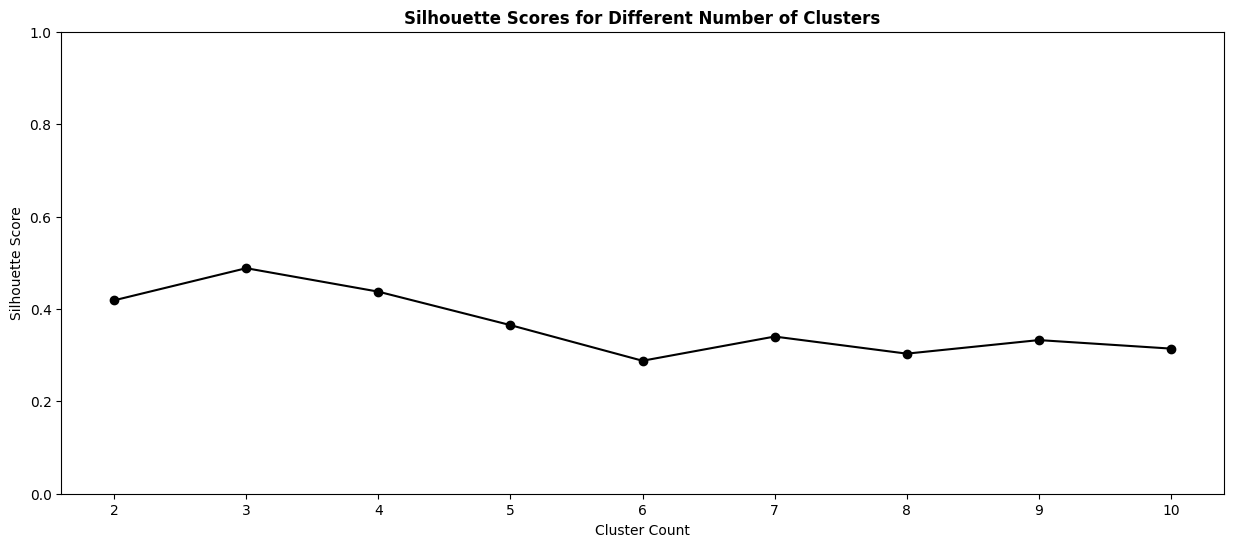

In [25]:
# Plotting the change in silhouette score across different cluster counts
plt.figure(figsize = (15, 6))
plt.plot(cluster_array[1:], sil_scores_cluster, 'black')
plt.scatter(cluster_array[1:], sil_scores_cluster, color = 'black')
plt.title("Silhouette Scores for Different Number of Clusters", fontweight = 'bold')
plt.xlabel("Cluster Count")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)
plt.show()

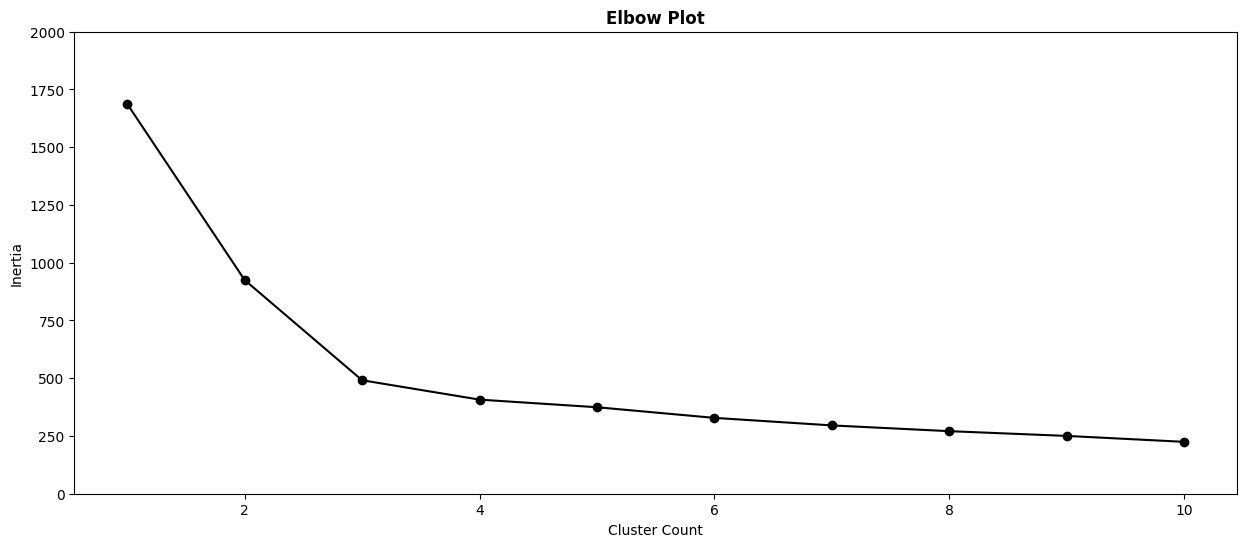

In [28]:
# Plotting the change in inertia across different cluster counts (elbow plot)
plt.figure(figsize = (15, 6))
plt.plot(cluster_array, inertia_cluster, 'black')
plt.scatter(cluster_array, inertia_cluster, color = 'black')
plt.title("Elbow Plot", fontweight = 'bold')
plt.xlabel("Cluster Count")
plt.ylabel("Inertia")
plt.ylim(0, 2000)
plt.show()

**interpretation!!**

### K-Means Implementation (Updated)

This section **includes the updates section for k-means based on optimal cluster number (3)**

In [30]:
kmeans = k_means(3, 1000)
kmeans.fit(wine_data_pca)
labels = kmeans.cluster_labels

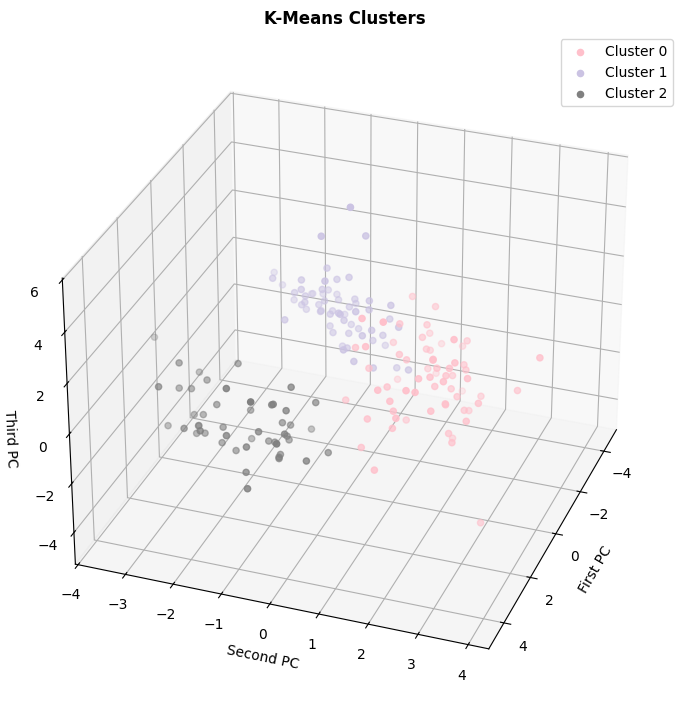

In [31]:
# Visualizing the transformed data with k-means clusters
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(labels)
label_to_color = {0: 'pink', 1: '#CBC3E3', 2: 'gray'}

for label in unique_labels:
    mask = (labels == label)
    color = label_to_color.get(label)  # fallback color just in case
    marker = 'o'
    
    ax.scatter(
        wine_data_pca[mask, 0],
        wine_data_pca[mask, 1],
        wine_data_pca[mask, 2],
        c = color,
        marker = marker,
        label = f'Cluster {label}'
    )
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
ax.set_zlabel("Third PC")

ax.view_init(elev = 30, azim = 20)

ax.legend()
fig.tight_layout()

plt.title("K-Means Clusters", fontweight = 'bold')

plt.show()

In [32]:
n_clusters, n_noise, counts = evaluate_clusters(labels)
sil_score_false = silhouette_score(wine_data_pca, labels, ignore_noise = True)
print(f"Silhouette score : {sil_score_false:.3f}")

Cluster Evaluation Metrics:
---------------------------
Number of clusters: 3
Number of noise points: No noise points
Cluster counts (including noise as -1):
  Cluster 1.0: 62 points
  Cluster 0.0: 67 points
  Cluster 2.0: 49 points
Silhouette score : 0.488


**this is better than dbscan, although not ideal, but fine**

### Comparison with Existing Models

Although **this might not be good on this dataset, the important thing is whether the model works or not**. In this section, we compare the custom k-means class **to the performance from SciKit Learn (established model)**

In [33]:
from sklearn.cluster import KMeans
kmeans_sk = KMeans(n_clusters = 3)
kmeans_sk.fit(wine_data_pca)
labels_sk = kmeans_sk.labels_

In [35]:
n_clusters, n_noise, counts = evaluate_clusters(labels_sk)
sil_score_true = silhouette_score(wine_data_pca, labels_sk, ignore_noise = True)
print(f"Silhouette score: {sil_score_true:.3f}")

Cluster Evaluation Metrics:
---------------------------
Number of clusters: 3
Number of noise points: No noise points
Cluster counts (including noise as -1):
  Cluster 0.0: 62 points
  Cluster 2.0: 67 points
  Cluster 1.0: 49 points
Silhouette score: 0.488


**interpretation - this is the same as our model, which is good**